CASE -

There is a medical insurance company & this company wants to create an automatic system that can predict what is the medical insurance cost of a person wiil be. We are going to build a machine learning system that can learn from the data & which can predict the medical insurance cost of a person.

WORK FLOW -

Insurance cost data

Data Analysis

Data Pre Processing

Train Test Split

Linear Regression Model

Model Evaluation

Predictive System

Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection & Analysis

In [3]:
# Importing data

data = pd.read_csv(r'C:\Users\SHREE\Downloads\Python CODES\Medical Insurance Cost Prediction Using Linear Regression Model\insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Checking shape of dataset

data.shape

(1338, 7)

In [5]:
# Getting some information about dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features of Dataset:

- Sex

- Smoker

- Region

In [6]:
# Checking for missing values

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# Statistical measures of data

data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Data Analysis with Visualisation

C:\Users\SHREE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


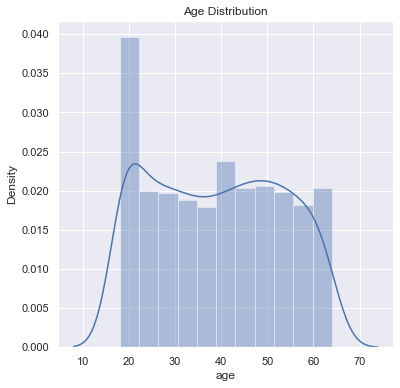

In [10]:
# Distribution of Age

sns.set()
plt.figure(figsize = (6,6))
sns.distplot(data['age'])
plt.title('Age Distribution')
plt.show()

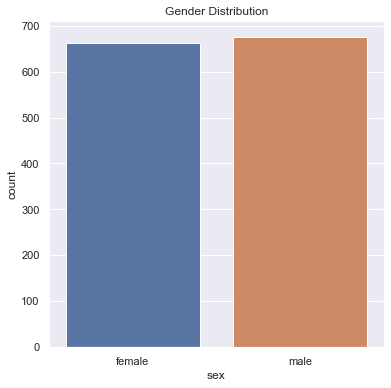

In [11]:
# We are plotting count plot as 'sex' is a categorical column
# Count of Gender

plt.figure(figsize = (6,6))
sns.countplot(x = 'sex', data = data)
plt.title('Gender Distribution')
plt.show()

In [12]:
# Checking the count of categorical values in sex column

data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\SHREE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


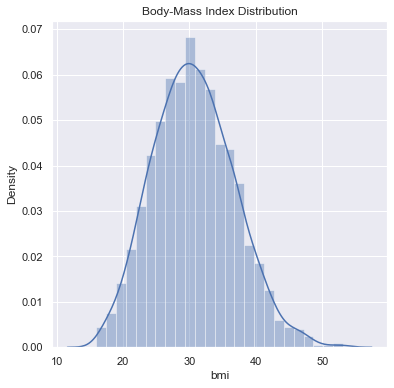

In [13]:
# Distribution of BMI

sns.set()
plt.figure(figsize = (6,6))
sns.distplot(data['bmi'])
plt.title('Body-Mass Index Distribution')
plt.show()

Normal BMI Range --> Under weight > 18.5 to 24.9 < Over weight

From above graph we can infere that lot of people are over weight, this can INCREASE the insurance cost of a person.

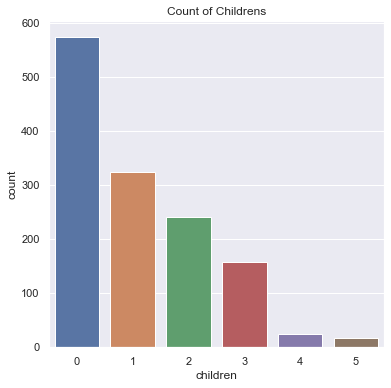

In [14]:
# Count of children column

plt.figure(figsize = (6,6))
sns.countplot(x = 'children', data = data)
plt.title('Count of Childrens')
plt.show()

In [15]:
# Checking the count of categorical values in children column

data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

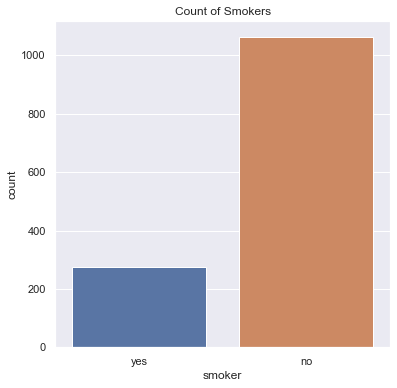

In [16]:
# Count of smoker column

plt.figure(figsize = (6,6))
sns.countplot(x = 'smoker', data = data)
plt.title('Count of Smokers')
plt.show()

In [17]:
# Checking the count of categorical values in smoker column

data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

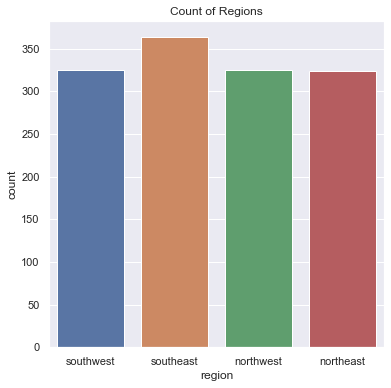

In [18]:
# Count of region column

plt.figure(figsize = (6,6))
sns.countplot(x = 'region', data = data)
plt.title('Count of Regions')
plt.show()

In [19]:
# Checking the count of categorical values in region column

data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\SHREE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


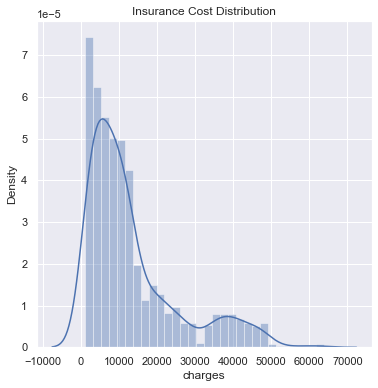

In [20]:
# Distribution of Charges

sns.set()
plt.figure(figsize = (6,6))
sns.distplot(data['charges'])
plt.title('Insurance Cost Distribution')
plt.show()

Data Pre Processing

Encoding the Categorical Feature

In [21]:
# Encoding sex column
data.replace({'sex': {'male':0, 'female':1}}, inplace = True)

# Encoding smoker column
data.replace({'smoker': {'yes':0, 'no':1}}, inplace = True)

# Encoding region column
data.replace({'region': {'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace = True)

In [23]:
# Encoded data

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


Splitting Features & Target

In [24]:
x = data.drop(columns = 'charges', axis = 1)
y = data['charges']

In [25]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [26]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting Data into Train & Test

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [28]:
print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Traing

Linear Regression Model - We have x-axis & y-axis & we have taken features on x-axis & target on y-axis. In this, data points will be plotted accordingly. When we use Linear Regression model it tries to fit in data & we will get a 'Best Fit Line' (Passes through maximum data points).

Line equation - Y = mX + C 

X - input features

Y - Prediction Probability

m - Slope (co-efficient value of feature)

C - Intercept (constant)

In [30]:
# Loding Linear regression model

reg = LinearRegression()

In [31]:
reg.fit(x_train, y_train)

LinearRegression()

Model Evaluation

In [32]:
# Prediction on training data

train_data_predict = reg.predict(x_train)

In [33]:
# R Squared Value

r2_train = metrics.r2_score(y_train, train_data_predict)
print('R Squared Value :', r2_train)

R Squared Value : 0.751505643411174


In [34]:
# Prediction on testing data

test_data_predict = reg.predict(x_test)

In [35]:
# R Squared Value

r2_test = metrics.r2_score(y_test, test_data_predict)
print('R Squared Value :', r2_test)

R Squared Value : 0.7447273869684077


Over Fitting - 

Model will over learn on train data, we will get high evaluation value on train data & low evaluation value on test data. For a Good Fit Model the ealuation value of both train data & test data should be almost equal.

CONCLUSION - 

Our model is good fit with decent R Squared value, it should be used for prediction.

Predictive System

In [37]:
input_data = (31,1,25.74,0,1,0) # Have to change categorical values manually like sex,smoker,region

# Changing input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshaping the array for one sample
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = reg.predict(input_data_reshape)
print(prediction)

print('The Insurance Cost is USD :', prediction[0])

[3760.0805765]
The Insurance Cost is USD : 3760.0805764960514


C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
